# Project #0, Getting Familiar

**Devon DeJohn** | PHY 4611 | January 2, 2019

> The purpose of this project is to familiarize ourselves with the programming language we’ve chosen to use in this class. In this notebook we perform basic matrix algebra, plot some simple functions, and implement an `n`-th order polynomial interpolation function.

## Import statements

This is just some initialization code to import the various packages that Python doesn't include in its stock codebase.

`sys` exposes system information.

`math` allows access to some basic mathematical functions, like `sin(x)` and `floor(x)`.

`timeit` is a very basic library that allows for simple timing of code execution, and the ability to run multiple trials.

`random` is used for generating various objects containing random numbers.

`scipy` is a massive library used in scientific computing.

`numpy` is the bog-standard library for numerical routines in Python.

`seaborn` is a stylesheet used to alter the appearance of graphical plots.

`matplotlib` is the standard data plotting library.

In [9]:
# Imports and figure size
import sys
import math
import timeit
import random
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import linalg as la
from scipy import special

sns.set()
sns.set_palette('bright')
sns.set_style('dark')
plt.rcParams["figure.figsize"] = [15,15]

## 'Hello'

> Use your language’s input-output routines to run the classic `hello` program and print “Hello, world” to the terminal.

There’s really nothing to this—you simply run Python’s built-in print function by passing in the string to print!


In [2]:
print("Greetings, Earthlings!")

Greetings, Earthlings!


## Basic matrix algebra

> Write down the result for each case below and then check your answer in Python.

This exercise ended up not being very easy simply because the code examples in the book are all written in `Python 2.7`, and I have `Python 3.7.2` on my machine. Some of the syntax has changed quite a bit since `2.7`, so to check the results I had to do some digging around to find syntax examples for what the book was asking.

The book is also not very clear on whether it was intended that the reader implement their own matrix methods for Python’s stock list data-type, or if Garcia simply wanted the reader to use the numpy library.

In [3]:
# Print a very simple matrix nicely.
def print_matrix(A):
    for row in A:
        print(" "*4, *row)

A = [[1, 2], [3, 4]]
B = np.array(A)

print("A+A:"); print_matrix(np.array(A) + np.array(A))
print("B+B:"); print_matrix(B+B)
print("A+B:"); print_matrix(np.array(A)+B)
print("A-A:"); print_matrix(np.array(A) - np.array(A))
print("B-B:"); print_matrix(B-B)
print("2*A:"); print_matrix(2*np.array(A))
print("2*B:"); print_matrix(2*B)
print("A*A:"); print_matrix(np.array(A)@np.array(A))
print("B*B:"); print_matrix(np.matmul(B,B))
print("B.B:"); print_matrix(np.dot(B,B))
print("B^2:"); print_matrix(la.matrix_power(B,2))
print("B/B:"); print_matrix(B/B)

A+A:
     2 4
     6 8
B+B:
     2 4
     6 8
A+B:
     2 4
     6 8
A-A:
     0 0
     0 0
B-B:
     0 0
     0 0
2*A:
     2 4
     6 8
2*B:
     2 4
     6 8
A*A:
     7 10
     15 22
B*B:
     7 10
     15 22
B.B:
     7 10
     15 22
B^2:
     7 10
     15 22
B/B:
     1.0 1.0
     1.0 1.0


## Basic plots

> Define the vectors x and y and plot them using Matplotlib.

All of these plotting routines are pretty straightforward except for `part d`, which asks us to call `plt.plot(x, y, ’-‘, x(1:2:10), y(1:2:10), ‘+’)`.

This syntax is not supported in `Python 3.7.2` and it’s not entirely clear what is the expected result. I looked through documentation on `Python 2.7` and couldn’t find any details about this syntax. I had initially thought it was array slicing, but even in `2.7` slicing uses square brackets.

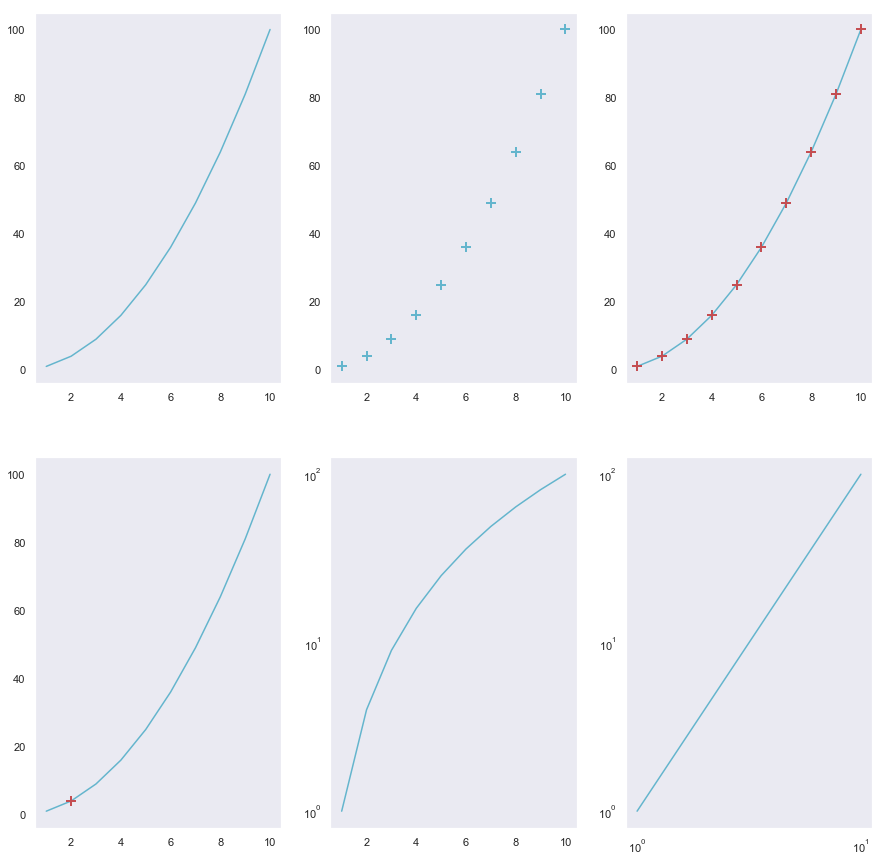

In [10]:
x = np.linspace(1,10,10)
y = x**2

# 3a
plt.subplot(231)
plt.plot(x,y,'c-')

# 3b
plt.subplot(232)
plt.plot(x,y,'c+', mew = 2, markersize = 10) # mew = marker edge width

# 3c
plt.subplot(233)
plt.plot(x,y,'c-',x,y,'r+', mew = 2, markersize = 10)

# 3d
# The book is very ambiguous here. It's written in Python 2.7, but I could not find
# anything in the 2.7 documentation that describes what x(1:2:10) is supposed to do,
# so I assumed that it is simply an alternate syntax for array slicing.
plt.subplot(234)
plt.plot(x,y,'c-',x[1:2:10],y[1:2:10],'r+', mew = 2, markersize = 10)

# 3e
plt.subplot(235)
plt.semilogy(x,y,'c-')

# 3f
plt.subplot(236)
plt.loglog(x,y,'c')

plt.show()

## Reproduce plots from book

> Reproduce the plots shown in `Figure 1.1`

This was straightforward, although I did need to learn how to create a rose curve for six pedals which involved a little bit of trial and error. I wrote a function that abstracts away the maths behind the curve so that a user can simply call `rhodonea(x, p, w)`, where x is an `np.linspace()`, p is the number of petals desired, and w is a parameter that controls the width of the petals. This function returns an array of y-values for the purposes of plotting.

$$\text{rhodonea(x, p, w)} = |sin^w (px/2)|$$

The six-petal curve was a curious challenge, since using the standard sine function results in what appears to be only three petals when in fact the other three petals are simply reflected across the x-axis and superimposed on the others. This can be fixed by either using the absolute value of the sine function, or by squaring the sine function.

However, that exponent also controls the width of the petals. Even exponents produce the number of petals we want, but if a skinnier petal is desired, we must increase the exponent to say, three. This is where the addition of the absolute value comes in, so that any exponent can by used, thus allowing finer control over the width of the petals.

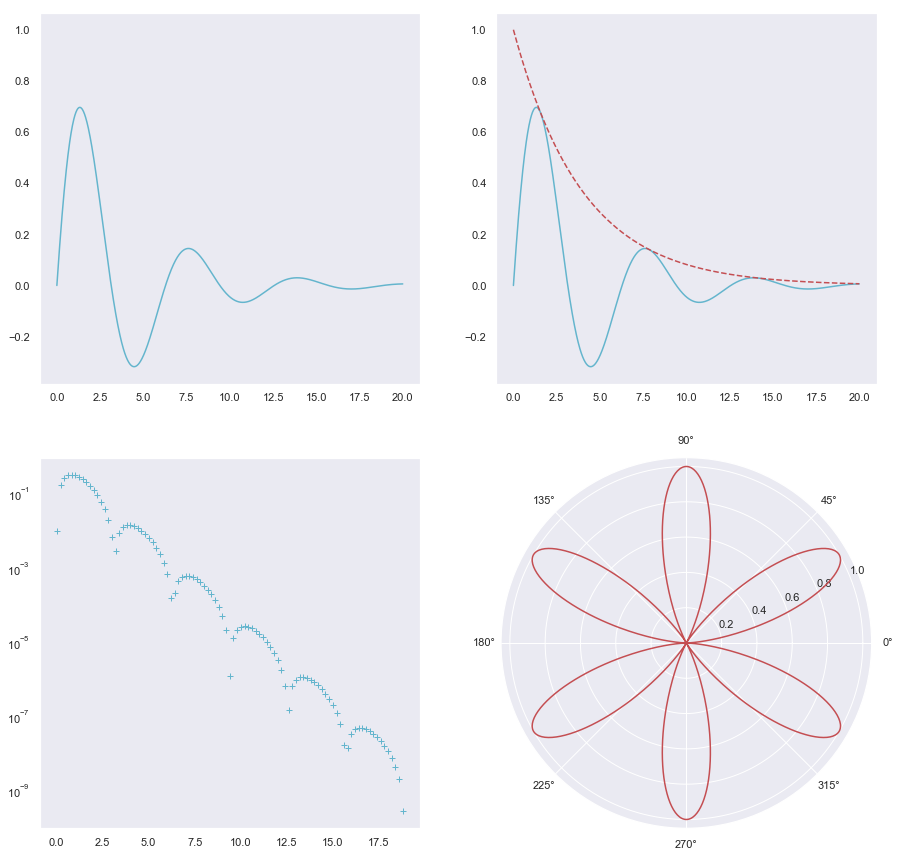

In [11]:
# Helper function for exercise 4a.
def f1(x):
    return np.exp(-x/4)*np.sin(x)

# Helper function for exercise 4c.
def f2(x):
    return np.exp(-x)*np.sin(x)
    
# Integer p is number of petals, integer w is 'pinch' factor; larger w = skinnier petals.
def rhodonea(x,p,w):
    return [abs(np.sin(p*xx/2)**w) for xx in x]
    
    
# 4a
x = np.linspace(0,20,1000)
y = [f1(i) for i in x]

plt.subplot(221)
plt.plot(x,y,'c-',x,[np.exp(-i/4) for i in x],' ')

# 4b
plt.subplot(222)
plt.plot(x,y,'c-',x,[np.exp(-i/4) for i in x],'r--')

# 4c
x = np.arange(0.01,18.85,0.2)
plt.subplot(223)
plt.semilogy(x, [abs(np.exp(-i)*np.sin(i)) for i in x], 'c+')

# 4d
x = np.linspace(0, 2*np.pi, 1000)
plt.subplot(224, projection="polar")
plt.polar(x, rhodonea(x, 6, 2), 'r-')

plt.show()

## Machine limits

Finding your machine limits is actually very easy to do with Python, as it exposes this information through the `sys` package. Here is the output from `sys.float_info`:

                 max float:   1.7976931348623157e+308
             max expoonent:   1024
      max base 10 exponent:   308

                 min float:   2.2250738585072014e-308
             min expoonent:   -1021
      min base 10 exponent:   -307

    min ϵ in   (1+ϵ)-1 = ϵ:   2.220446049250313e-16
            max nxn matrix:   100000 x 100000
        longest row vector:   10000000000 integer 1's
        
*Note: matrix and row vector limits were found through trial-and-error.*

In [6]:
max_flt = sys.float_info.max
max_exp = sys.float_info.max_exp
max_base10 = sys.float_info.max_10_exp
min_flt = sys.float_info.min
min_exp = sys.float_info.min_exp
min_base10 = sys.float_info.min_10_exp
min_eps = sys.float_info.epsilon

## FLOPS estimation

> Write a program to estimate the number of floating point operations that can be performed in one second.

For this exercise I initialize two `nxn` matrices of random digit entries, with `n = 500`. Each entry in a matrix multiplication is the result of the dot product of two row vectors, which requires `n` multiplications and `n-1` additions.

$$\text{E.g.: let } x = \langle 1, 2, 3 \rangle \text{ and } y = \langle 4, 5, 6\rangle.$$

Then their scalar (dot) product is the sum of their component-wise products: `1*4 + 2*5 + 3*6`; three multiplications are performed, and two additions.

Then, since there are `n^2` elements in an `nxn` matrix, there are `n^2` number of dot products. So the total number of operations for the multiplication of two square matrices is

$$n^2 \cdot (n + (n – 1)) = 2n^3 - n^2$$

Using the `timeit` package, the number of operations for this matrix multiplication is divided by the time taken to evaluate the code, which results in a rough approximation of the number of floating point arithmetic operations my particular machine can handle.

After running a few trials I found that my machine can perform around `14.2 million FLOP/s` using my matrix multiplication method written in Python. However, my method is very slow, with lots of overhead due to the way arrays work in Python. Out of curiosity, I translated my code as faithfully as possible into Julia and was surprised to find I was getting around `1.3 billion FLOP/s`—same code, massively disparate performance!

In [ ]:
# My own matrix multiplication routine, used for the FLOPS estimation exercise.        
def mat_mult(a, b):
    z = list(zip(*b))
    return [[sum(i*j for i,j in zip(k,m)) for m in z] for k in a]

# Initialize two nxn matrices of random digits.
n = 500
a = np.random.randint(-9, 9, (n, n))
b = np.random.randint(-9, 9, (n, n))

# Number of operations.
calcs = 2*n**3 - n**2

# Time mat_mult(a,b) over one trial.
mat_mult_timed = timeit.timeit('mat_mult(a, b)', globals=globals(), number=1)

# Rough estimation of FLOPS rounded to the nearest thousand.
print(f"FLOPS: {1000*round(calcs/(1000*mat_mult_timed))}")

## Interpolation

> Write an interpolation function (?)

The assignment sheet problem numbers don’t correspond to those in the book, and since there are multiple interpolation function questions in the exercises section, I made the assumption that we were to write our own interpolation function using Lagrange polynomials, test, and plot the results.
This was a very interesting exercise which involves implementing quite an elegant algorithm to generate the Lagrange basis polynomials.

One thing I’d very much like to improve on my implementation is to convert the function into a curried version of itself that will return a lambda expression instead of a single explicitly evaluated `y` for a given `x`. From what I understand, given `n` number of points `n > 2`, a unique polynomial of degree `n-1` can be created, from which any other point on the unknown curve can be interpolated.

Once the points are loaded into the program, finding the unknown curve is simply a matter of generating the Lagrange polynomial. In my current implementation however, to plot the interpolated curve one must call the interpolation function as many times as there are x-values in the x-range on which to plot the curve. This results in calculating the same Lagrange polynomial more than once, and is computationally a waste of time and resources.

What I’d like to do is use currying to call `interpf` with only the data points, and have it return a lambda expression on which I can evaluate my x-range for plotting purposes.

Currying is a functional programming concept that essentially strips away function arguments by abstracting parameters out of the function using lambda expressions.

I am familiar with currying and understand basic implementations, but I couldn’t figure out how to convert my Lagrange polynomial generator into such a function. I will continue working on this however, because it’s an interesting problem.

In [13]:
def intrp(x, xx, yy):
    k = len(xx)
    if k != len(set(xx)):
        return "Cannot interpolate from duplicate x-values!"

    # Lagrange basis polynomial helper function.
    def lbp(j):
        p = 1
        for m in range(1,k):
            p *= (x - xx[(j+m)%k])/(xx[j] - xx[(j-m)%k])
        return p
        
    return sum(yy[j]*lbp(j) for j in range(k))

# Zeroth-order Bessel function data points.
b0 = [0.0, 0.5, 1.0]
y0 = [1.0, 0.9385, 0.7652]

# Zeroth-order Bessel function evaluated.
by = [sp.special.jn(0, x) for x in xx]

# Zeroth-order Bessel function interpolated.
xx = [0.3, 0.9, 1.1, 1.5, 2.0]
yy = [intrp(x, b0, y0) for x in xx]

print("interpolated bessel:\n", yy, "\n")
print("scipy bessel:\n", by, "\n")

# Using the extra points the book provides in later exercises:
# Zeroth-order Bessel function data points.
b0 = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y0 = [1.0, 0.99, 0.9604, 0.9120, 0.8463, 0.7652]

# Zeroth-order Bessel function evaluated.
by = [sp.special.jn(0, x) for x in xx]

# Zeroth-order Bessel function interpolated.
xx = [0.3, 0.9, 1.1, 1.5, 2.0]
yy = [intrp(x, b0, y0) for x in xx]

print("extra points interpolated bessel:\n", yy, "\n")
print("scipy bessel:\n", by, "\n")

interpolated bessel:
 [0.9765159999999998, 0.8088040000000001, 0.717124, 0.48009999999999975, 0.08319999999999972] 

scipy bessel:
 [0.9776262465382961, 0.8075237981225449, 0.7196220185275111, 0.5118276717359181, 0.22389077914123562] 

extra points interpolated bessel:
 [0.9776199218749998, 0.8075488281250005, 0.7195042968749985, 0.5076339843749977, 0.1853999999997029] 

scipy bessel:
 [0.9776262465382961, 0.8075237981225449, 0.7196220185275111, 0.5118276717359181, 0.22389077914123562] 



## Explorations

Before I received your email with the correct interpolation exercise, I had already written a general lagrange polynomial generator and had been playing around with different curves. I found that in general, in order to interpolate an `n`-th order polynomial, `n+1` data points are *required* for any semblance of accuracy. A small example is shown below.

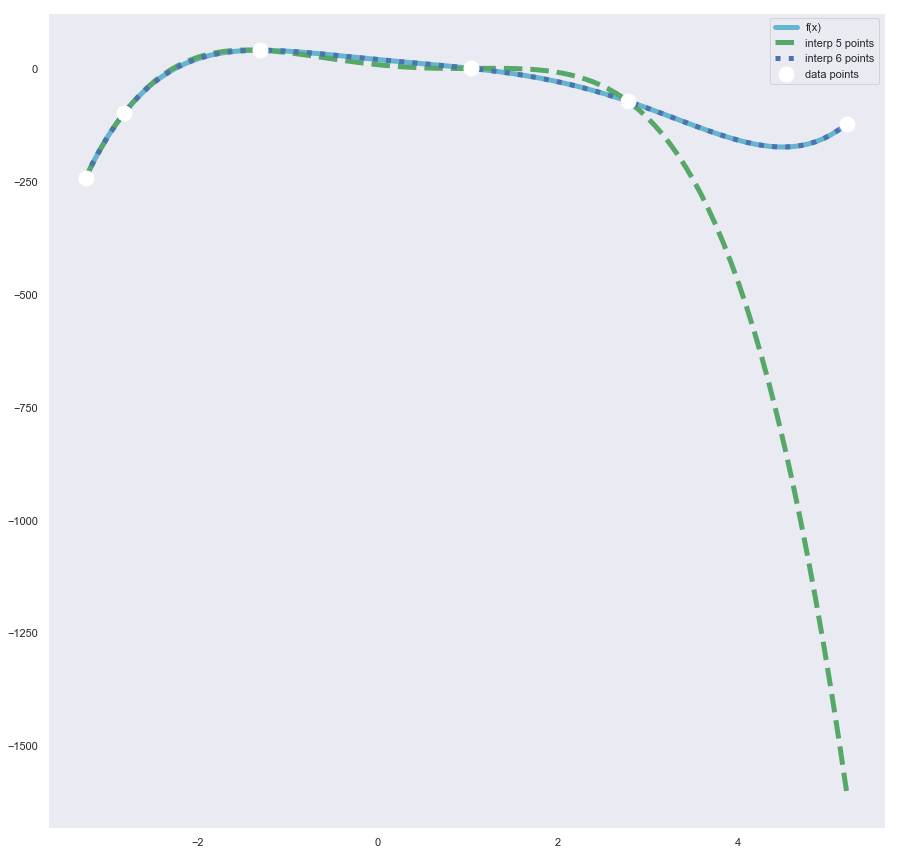

In [14]:
# Come up with some random polynomial.
# f(x) = 1/3 (x-1)^5 - 1/4*x^4 - 3x^3 + 5(x-2)^2 - x
def f_test(x):
    return 1/3*(x-1)**5 - 1/4*x**4 - 3*x**3 + 5*(x-2)**2 - x

# Generate some random points on the curve f(x):
x_ = [-3.24, -2.81, -1.31, 1.04, 2.78, 5.2]
y_ = [f_test(x) for x in x_]

# Remove one data point:
x5 = x_[:5]
y5 = y_[:5]

# x-range for plotting:
xx = np.linspace(min(x_), max(x_), 100)

# y-range of f(x):
yf = [f_test(x) for x in xx]

# Interpolate known curve from 6 data points:
y6 = [intrp(x, x_, y_) for x in xx]

# Interpolate known curve from 5 data points:
y5 = [intrp(x, x5, y5) for x in xx]

plt.plot(xx, yf, 'c-', xx, y5, 'g--', xx, y6, 'b:', x_, y_, 'wo', lw = 5, markersize = 15)
plt.legend(('f(x)', 'interp 5 points', 'interp 6 points', 'data points'), loc='upper right');

# Closing remarks

In all honesty, `matplotlib` is quite frustrating to work with. It's great for setting up a basic plot, but anything beyond simple, one-off plots and the syntax ends up getting in the way; the plotting routines are simply too generalized in my opinion. Less importantly, the default style of `matplotlib` is **extremely** ugly.

I'm quite satisfied with the interpolation function, and am curious to learn more. Clearly it's only suitable for polynomial functions of relatively low order. Other methods—such as Newton's divided differences—seem to be much better suited to this type of problem. Still, I was quite surprised at how well Lagrange polynomials can capture known functions. Joseph-Louis Lagrange was quite brilliant.

## Appendix A: code base

```python
# Imports and figure size
import sys
import math
import timeit
import random
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import linalg as la
from scipy import special

sns.set()
sns.set_palette('bright')
sns.set_style('dark')
plt.rcParams["figure.figsize"] = [15,15]

# Exercise 1 (hello).
print("Greetings, Earthlings!")

# Exercise 2 (matrix algebra).
# Print a matrix nicely.
def print_matrix(A):
    for row in A:
        print(" "*4, *row)

A = [[1, 2], [3, 4]]
B = np.array(A)

print("A+A:"); print_matrix(np.array(A) + np.array(A))
print("B+B:"); print_matrix(B+B)
print("A+B:"); print_matrix(np.array(A)+B)
print("A-A:"); print_matrix(np.array(A) - np.array(A))
print("B-B:"); print_matrix(B-B)
print("2*A:"); print_matrix(2*np.array(A))
print("2*B:"); print_matrix(2*B)
print("A*A:"); print_matrix(np.array(A)@np.array(A))
print("B*B:"); print_matrix(np.matmul(B,B))
print("B.B:"); print_matrix(np.dot(B,B))
print("B^2:"); print_matrix(la.matrix_power(B,2))
print("B/B:"); print_matrix(B/B)

# Exercise 3 (basic plots).
x = np.linspace(1,10,10)
y = x**2

# 3a
plt.subplot(231)
plt.plot(x,y)

# 3b
plt.subplot(232)
plt.plot(x,y,'+', mew = 2, markersize = 10) # mew = marker edge width

# 3c
plt.subplot(233)
plt.plot(x,y,'-',x,y,'+', mew = 2, markersize = 10)

# 3d
# The book is very ambiguous here. It's written in Python 2.7, but I could not find
# anything in the 2.7 documentation that describes what x(1:2:10) is supposed to do,
# so I assumed that it is simply an alternate syntax for array slicing.
plt.subplot(234)
plt.plot(x,y,'r-',x[1:2:10],y[1:2:10],'bx', mew = 2, markersize = 10)

# 3e
plt.subplot(235)
plt.semilogy(x,y)

# 3f
plt.subplot(236)
plt.loglog(x,y)

plt.show()

# Exercise 4 (reproduce plots from book).
# Helper function for exercise 4a.
def f1(x):
    return np.exp(-x/4)*np.sin(x)

# Helper function for exercise 4c.
def f2(x):
    return np.exp(-x)*np.sin(x)
    
# Integer p is number of petals, integer w is 'pinch' factor; larger w = skinnier petals.
def rhodonea(x,p,w):
    return [abs(np.sin(p*xx/2)**w) for xx in x]
    
# 4a
x = np.linspace(0,20,1000)
y = [f1(i) for i in x]

plt.subplot(221)
plt.plot(x,y,'-',x,[np.exp(-i/4) for i in x],' ')

# 4b
plt.subplot(222)
plt.plot(x,y,'-',x,[np.exp(-i/4) for i in x],'--')

# 4c
x = np.arange(0.01,18.85,0.2)
plt.subplot(223)
plt.semilogy(x, [abs(np.exp(-i)*np.sin(i)) for i in x], '+')

# 4d
x = np.linspace(0, 2*np.pi, 1000)
plt.subplot(224, projection="polar")
plt.polar(x, rhodonea(x, 6, 2))

plt.show()

# Exercise 5 (machine limits).
max_flt = sys.float_info.max
max_exp = sys.float_info.max_exp
max_base10 = sys.float_info.max_10_exp
min_flt = sys.float_info.min
min_exp = sys.float_info.min_exp
min_base10 = sys.float_info.min_10_exp
min_eps = sys.float_info.epsilon

# Exercise 6 (FLOPS estimation).
# My own matrix multiplication routine, used for the FLOPS estimation exercise.        
def mat_mult(a, b):
    z = list(zip(*b))
    return [[sum(i*j for i,j in zip(k,m)) for m in z] for k in a]

# Initialize two nxn matrices of random digits.
n = 500
a = np.random.randint(-9, 9, (n, n))
b = np.random.randint(-9, 9, (n, n))

# Number of operations.
calcs = 2*n**3 - n**2

# Time mat_mult(a,b) over one trial.
mat_mult_timed = timeit.timeit('mat_mult(a, b)', globals=globals(), number=1)

# Rough estimation of FLOPS rounded to the nearest thousand.
print(f"FLOPS: {1000*round(calcs/(1000*mat_mult_timed))}")

# Exercise 7 (interpolation).
def intrp(x, xx, yy):
    k = len(xx)
    if k != len(set(xx)):
        return "Cannot interpolate from duplicate x-values!"

    # Lagrange basis polynomial helper function.
    def lbp(j):
        p = 1
        for m in range(1,k):
            p *= (x - xx[(j+m)%k])/(xx[j] - xx[(j-m)%k])
        return p
        
    return sum(yy[j]*lbp(j) for j in range(k))

# Interpolate on the zeroth-order Bessel function:
# Zeroth-order Bessel function data points.
b0 = [0.0, 0.5, 1.0]
y0 = [1.0, 0.9385, 0.7652]

# Zeroth-order Bessel function evaluated.
by = [sp.special.jn(0, x) for x in xx]

# Zeroth-order Bessel function interpolated.
xx = [0.3, 0.9, 1.1, 1.5, 2.0]
yy = [intrp(x, b0, y0) for x in xx]

print("interpolated bessel:\n", yy, "\n")
print("scipy bessel:\n", by, "\n")

# Using the extra points the book provides in later exercises:
# Zeroth-order Bessel function data points.
b0 = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y0 = [1.0, 0.99, 0.9604, 0.9120, 0.8463, 0.7652]

# Zeroth-order Bessel function evaluated.
by = [sp.special.jn(0, x) for x in xx]

# Zeroth-order Bessel function interpolated.
xx = [0.3, 0.9, 1.1, 1.5, 2.0]
yy = [intrp(x, b0, y0) for x in xx]

print("extra points interpolated bessel:\n", yy, "\n")
print("scipy bessel:\n", by, "\n")

# Interpolate a known curve:
# f(x) = 1/3 (x-1)^5 - 1/4*x^4 - 3x^3 + 5(x-2)^2 - x
def f_test(x):
    return 1/3*(x-1)**5 - 1/4*x**4 - 3*x**3 + 5*(x-2)**2 - x

# Generate some random points on a known curve:
x_ = [-3.24, -2.81, -1.31, 1.04, 2.78, 5.2]
y_ = [f_test(x) for x in x_]

# Generate the known curve:
xf = np.linspace(min(x_), max(x_), 100)
yf = [f_test(x) for x in xf]

# Interpolate known curve from data points:
xx = np.linspace(min(x_), max(x_), 100)
yy = [intrp(x, x_, y_) for x in xx]

plt.plot(xx, yy, 'b-', xf, yf, 'r--', x_, y_, 'co', lw = 5, markersize = 15)

# Interpolate from random data points:
n = 10
x_ = [random.uniform(-1, 1) for _ in range(n)]
y_ = [random.uniform(-1, 1) for _ in range(n)]

xx = np.linspace(min(x_), max(x_), 1000)
yy = [intrp(x, x_, y_) for x in xx]

plt.plot(xx, yy, 'y-', x_, y_, 'co', lw = 5, markersize = 15)
plt.savefig("interpf random")
```